#  **Task1: Object detection**

### **Image**



In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
cd /content/drive/MyDrive/Colab Notebooks/Task1_

/content/drive/MyDrive/Colab Notebooks/Task1_


In [16]:
pwd

'/content/drive/MyDrive/Colab Notebooks/Task1_'

In [17]:
! git clone https://github.com/DatumLearning/SSD_using_OpenCV.git

fatal: destination path 'SSD_using_OpenCV' already exists and is not an empty directory.


In [18]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [19]:
classNames = { 0: 'background',
1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat',
5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 9: 'chair',
10: 'cow', 11: 'diningtable', 12: 'dog', 13: 'horse',
14: 'motorbike', 15: 'person', 16: 'pottedplant',
17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor' }

In [20]:
proto = "/content/drive/MyDrive/Colab Notebooks/Task1_/SSD_using_OpenCV/MobileNetSSD_deploy.prototxt"
weights ="/content/drive/MyDrive/Colab Notebooks/Task1_/SSD_using_OpenCV/MobileNetSSD_deploy.caffemodel"
net = cv2.dnn.readNetFromCaffe (proto , weights)

In [21]:

img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Task1_/SSD_using_OpenCV/inputs/detect.jpg")


In [22]:
img_resized = cv2.resize(img, (300, 300))


blob = cv2.dnn.blobFromImage(img_resized , 0.007843 ,(300 ,300),
                             (127.5 , 127.5 , 127.5 ) , False)

In [23]:
net.setInput(blob)

In [24]:
detections = net.forward()

In [25]:
final = detections.squeeze()

In [26]:
final

array([[ 0.0000000e+00,  7.0000000e+00,  9.9871933e-01,  8.2792401e-01,
         3.7000382e-01,  9.9139488e-01,  5.5852658e-01],
       [ 0.0000000e+00,  7.0000000e+00,  9.9809164e-01,  6.4858103e-01,
         3.2009852e-01,  8.2793999e-01,  5.6740898e-01],
       [ 0.0000000e+00,  1.6000000e+01,  9.3921268e-01,  5.3148395e-01,
         6.8968564e-01,  6.9722313e-01,  9.3362933e-01],
       [ 0.0000000e+00,  1.5000000e+01,  5.4055762e-01, -8.6066090e-03,
         4.6806037e-01,  3.1246599e-02,  7.3655331e-01],
       [ 0.0000000e+00,  1.5000000e+01,  5.1404965e-01,  3.5664949e-01,
         4.0307885e-01,  4.0114138e-01,  6.2301713e-01],
       [ 0.0000000e+00,  1.5000000e+01,  3.8650993e-01,  1.5344469e-01,
         4.0824038e-01,  2.1512823e-01,  5.7624280e-01],
       [ 0.0000000e+00,  1.5000000e+01,  3.7535971e-01,  2.5846785e-01,
         3.1196287e-01,  2.7742630e-01,  4.1472170e-01],
       [ 0.0000000e+00,  1.5000000e+01,  3.4698659e-01,  5.3732222e-01,
         3.8311991e-01,  

In [27]:
height, width,_ = img.shape


In [28]:
final.shape[0]

100

In [29]:
font= cv2.FONT_HERSHEY_SIMPLEX

In [30]:
ig = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Task1_/SSD_using_OpenCV/inputs/detect.jpg")

for i in range(final.shape[0]):
    conf = final[i, 2]
    if conf > 0.5:
        class_names = classNames[final[i, 1]]
        confidence_str = f"{class_names}: {conf * 100:.2f}%"  # Create a string with class name and confidence score
        x1n, y1n, x2n, y2n = final[i, 3:]
        x1 = int(x1n * width)
        y1 = int(y1n * height)
        x2 = int(x2n * width)
        y2 = int(y2n * height)
        top_left = (x1, y1)
        bottom_right = (x2, y2)
        ig = cv2.rectangle(ig, top_left, bottom_right, (0, 255, 0), 3)

        ig = cv2.putText(ig, confidence_str, (x1, y1 - 20), font, 0.5, (255, 0, 0), 1, cv2.LINE_AA)


In [31]:
output_path= ('/content/drive/MyDrive/Colab Notebooks/Task1_/SSD_using_OpenCV/results/output_image.jpeg')
cv2.imwrite(output_path, ig)


True

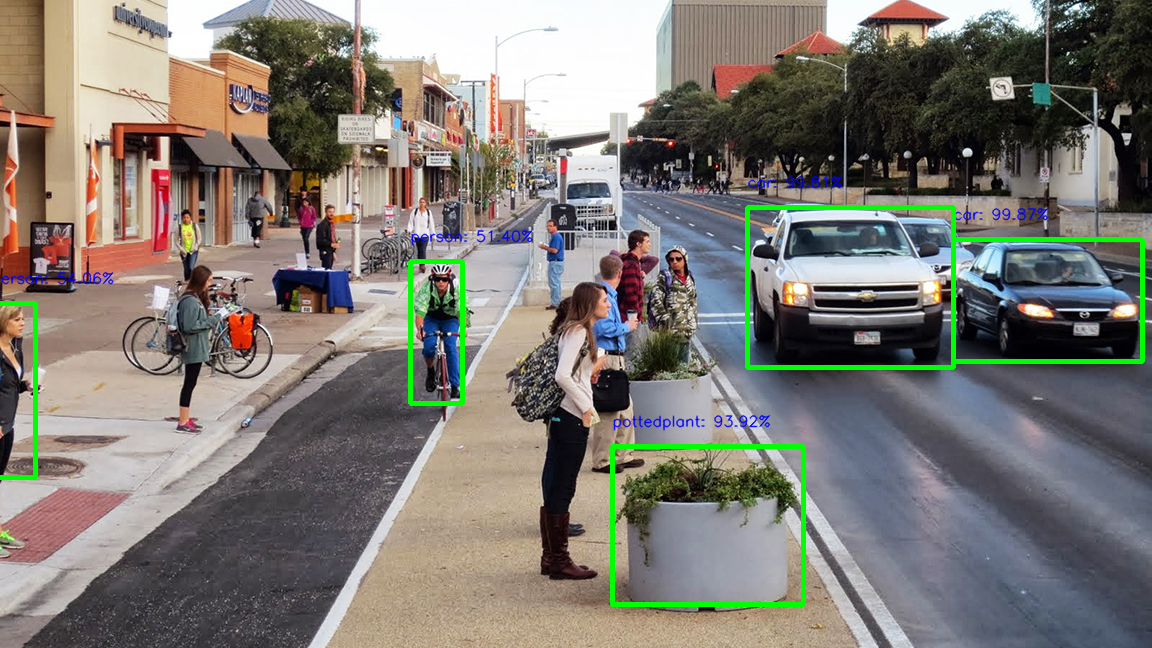

In [32]:
 cv2_imshow(ig)

## **Video**

In [1]:
import cv2
from google.colab.patches import cv2_imshow
# Load the SSD model and configuration
model_path = "/content/drive/MyDrive/Colab Notebooks/Task1_/SSD_using_OpenCV/MobileNetSSD_deploy.prototxt"
config_path = "/content/drive/MyDrive/Colab Notebooks/Task1_/SSD_using_OpenCV/MobileNetSSD_deploy.caffemodel"
net = cv2.dnn.readNetFromCaffe(model_path, config_path)

# Load the class names
classNames = { 0: 'background', 1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat', 5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 9: 'chair',10: 'cow', 11: 'diningtable', 12: 'dog', 13: 'horse',14: 'motorbike', 15: 'person', 16: 'pottedplant',17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor' }

# Open the video capture
input_video_path = "/content/drive/MyDrive/Colab Notebooks/Task1_/SSD_using_OpenCV/inputs/video.mp4"
cap = cv2.VideoCapture(input_video_path)

# Get the video's frame width and height
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define the codec and create a VideoWriter object to save the output video
output_video_path = "/content/drive/MyDrive/Colab Notebooks/Task1_/SSD_using_OpenCV/outputs/output_video.avi"
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_video_path, fourcc, 20.0, (frame_width, frame_height))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Prepare the input image for object detection
    blob = cv2.dnn.blobFromImage(frame, 0.007843, (300, 300), 127.5)

    # Set the input to the model and run forward pass
    net.setInput(blob)
    detections = net.forward()

    for i in range(detections.shape[2]):
        conf = detections[0, 0, i, 2]
        if conf > 0.5:  # Adjust the confidence threshold as needed
            class_id = int(detections[0, 0, i, 1])
            class_name = classNames[class_id]
            confidence_str = f"{class_name}: {conf * 100:.2f}%"

            x1, y1, x2, y2 = map(int, detections[0, 0, i, 3:7] * [frame_width, frame_height, frame_width, frame_height])
            top_left = (x1, y1)
            bottom_right = (x2, y2)

            # Draw bounding box and label
            frame = cv2.rectangle(frame, top_left, bottom_right, (0, 255, 0), 3)
            frame = cv2.putText(frame, confidence_str, (x1, y1 - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Write the frame to the output video
    out.write(frame)

# Release the capture and video writer objects
cap.release()
out.release()

# Close all OpenCV windows
cv2.destroyAllWindows()


# ***OCR***

### test

In [ ]:
!pip install pytesseract opencv-python

In [ ]:
!sudo apt install tesseract-ocr

In [ ]:
import cv2
import pytesseract
from pytesseract import Output
from google.colab.patches import cv2_imshow

# Load the invoice image
image_path = "/content/drive/MyDrive/Colab Notebooks/Task1_/ocr/invoice.png"
image = cv2.imread(image_path)

# Perform OCR
detection_image = image.copy()
detections = pytesseract.image_to_data(image, output_type=Output.DICT)

# Iterate through each detected word/character
for i in range(len(detections["text"])):
    text = detections["text"][i]
    print(text)
    conf = int(detections["conf"][i])
    x, y, w, h = detections["left"][i], detections["top"][i], detections["width"][i], detections["height"][i]

    # Filter out low confidence detections
    if conf > 50 and text.strip() != "":
        # Draw a rectangle around the detected word/character
         cv2.rectangle(detection_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with outlined information
cv2_imshow( detection_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
output_image_path = ('output_invoice_image.jpg')

cv2.imwrite(output_image_path, detection_image)